## 数据框出报表：分进合击策略

In [12]:
import pandas as pd

### 大概内容
* 分进合击出报表

利用pandas groupby出报表
* 合合合

聚合（agg方法）
* 进进进

对数据进行计算
* 分分分

单列或多列的数据统计
* 数据感

培养数据科学家的数据感和数据思维（如何糅合数据，展现数据，表达数据传递的意义）

#### 分进合击出报表

具体实例

In [13]:
# A0 简单读档并查看数据框讯息
# 注意看Dtype! 
df = pd.read_csv ("20春_pandas_week02_hurun_unicorn.tsv", encoding = "utf8", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
排名              494 non-null int64
企业名称            494 non-null object
Company Name    494 non-null object
估值（亿人民币）        494 non-null int64
国家              494 non-null object
城市              494 non-null object
行业              494 non-null object
掌门人/创始人         494 non-null object
成立年份            494 non-null int64
部分投资机构          494 non-null object
dtypes: int64(3), object(7)
memory usage: 38.7+ KB


##### 挑战A1

In [19]:
# A1 原完整代码
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
先行再国 = df.groupby ( by = ['行业', '国家'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再行)
display(先行再国)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 
    先行再国.to_excel(writer,sheet_name="先行再国") 

#\是为了转行方便看代码，无实际意义
#.sort_values根据这个值从大到小排序

企业名称 估值（亿人民币）               成立年份      
               数量       总和           均值    最新    最早
国家   行业                                            
中国   金融科技      22    17960   816.363636  2018  2002
     媒体和娱乐     17     8230   484.117647  2015  2003
美国   云计算       32     6880   215.000000  2015  2000
     共享经济       6     5670   945.000000  2017  2008
     金融科技      21     5020   239.047619  2017  2000
中国   共享经济       8     4740   592.500000  2016  2011
     电子商务      33     4220   127.878788  2015  2005
美国   消费品        7     4060   580.000000  2017  2006
中国   物流        16     3910   244.375000  2015  2000
美国   人工智能      20     3080   154.000000  2016  2003
     航天         3     2770   923.333333  2012  2002
     生命科学      10     2660   266.000000  2016  2006
     电子商务      17     2640   155.294118  2017  2007
     物流         9     2310   256.666667  2015  2010
中国   人工智能      15     2090   139.333333  2016  2009
     健康科技      13     2060   158.461538  2019  2000
美国   大数据        8     1850   231.250000  2013  2001
中国   新能源汽车     12     1810   150.833333  2017  2014
美国   媒体和娱乐      6     1720   286.666667  2014  2003
     健康科技      12     1550   129.166667  2017  2001
中国   软件与服务     15     1460    97.333333  2014  2001
     机器人        3     1400   466.666667  2013  2006
     房地产科技      7     1340   191.428571  2018  2010
英国   金融科技       6     1250   208.333333  2015  2011
中国   区块链        4     1250   312.500000  2017  2013
     教育科技      11     1190   108.181818  2014  2001
美国   区块链        4     1170   292.500000  2013  2011
新加坡  共享经济       1     1000  1000.000000  2012  2012
美国   游戏         5      970   194.000000  2012  2004
印度   金融科技       3      920   306.666667  2010  2000
...           ...      ...          ...   ...   ...
以色列  软件与服务      1      150   150.000000  2002  2002
瑞士   区块链        1      150   150.000000  2015  2015
日本   人工智能       1      150   150.000000  2014  2014
印度   大数据        1      150   150.000000  2004  2004
爱尔兰  云计算        1      150   150.000000  2000  2000
瑞典   新能源        1      150   150.000000  2016  2016
中国   新能源        2      140    70.000000  2008  2006
巴西   物流         2      140    70.000000  2013  2011
中国   游戏         1      100   100.000000  2015  2015
以色列  人工智能       1       70    70.000000  2010  2010
印度   即时通讯       1       70    70.000000  2012  2012
阿根廷  云计算        1       70    70.000000  2013  2013
西班牙  共享经济       1       70    70.000000  2011  2011
菲律宾  房地产科技      1       70    70.000000  2015  2015
以色列  生命科学       1       70    70.000000  2010  2010
韩国   金融科技       1       70    70.000000  2011  2011
卢森堡  电子商务       1       70    70.000000  2014  2014
瑞士   虚拟与增强现实    1       70    70.000000  2012  2012
印度   新零售        1       70    70.000000  2011  2011
英国   新能源        1       70    70.000000  2009  2009
芬兰   消费品        1       70    70.000000  2016  2016
印度   游戏         1       70    70.000000  2012  2012
     软件与服务      1       70    70.000000  2007  2007
哥伦比亚 物流         1       70    70.000000  2016  2016
巴西   健康科技       1       70    70.000000  2012  2012
日本   区块链        1       70    70.000000  2014  2014
法国   人工智能       1       70    70.000000  2016  2016
     媒体和娱乐      1       70    70.000000  2006  2006
爱沙尼亚 共享经济       1       70    70.000000  2013  2013
法国   健康科技       1       70    70.000000  2013  2013

[103 rows x 5 columns]

企业名称 估值（亿人民币）               成立年份      
               数量       总和           均值    最新    最早
行业      国家                                         
金融科技    中国     22    17960   816.363636  2018  2002
媒体和娱乐   中国     17     8230   484.117647  2015  2003
云计算     美国     32     6880   215.000000  2015  2000
共享经济    美国      6     5670   945.000000  2017  2008
金融科技    美国     21     5020   239.047619  2017  2000
共享经济    中国      8     4740   592.500000  2016  2011
电子商务    中国     33     4220   127.878788  2015  2005
消费品     美国      7     4060   580.000000  2017  2006
物流      中国     16     3910   244.375000  2015  2000
人工智能    美国     20     3080   154.000000  2016  2003
航天      美国      3     2770   923.333333  2012  2002
生命科学    美国     10     2660   266.000000  2016  2006
电子商务    美国     17     2640   155.294118  2017  2007
物流      美国      9     2310   256.666667  2015  2010
人工智能    中国     15     2090   139.333333  2016  2009
健康科技    中国     13     2060   158.461538  2019  2000
大数据     美国      8     1850   231.250000  2013  2001
新能源汽车   中国     12     1810   150.833333  2017  2014
媒体和娱乐   美国      6     1720   286.666667  2014  2003
健康科技    美国     12     1550   129.166667  2017  2001
软件与服务   中国     15     1460    97.333333  2014  2001
机器人     中国      3     1400   466.666667  2013  2006
房地产科技   中国      7     1340   191.428571  2018  2010
金融科技    英国      6     1250   208.333333  2015  2011
区块链     中国      4     1250   312.500000  2017  2013
教育科技    中国     11     1190   108.181818  2014  2001
区块链     美国      4     1170   292.500000  2013  2011
共享经济    新加坡     1     1000  1000.000000  2012  2012
游戏      美国      5      970   194.000000  2012  2004
金融科技    印度      3      920   306.666667  2010  2000
...           ...      ...          ...   ...   ...
生命科学    德国      1      150   150.000000  2000  2000
大数据     印度      1      150   150.000000  2004  2004
软件与服务   以色列     1      150   150.000000  2002  2002
游戏      英国      1      150   150.000000  2012  2012
区块链     马耳他     1      150   150.000000  2017  2017
人工智能    日本      1      150   150.000000  2014  2014
新能源     中国      2      140    70.000000  2008  2006
物流      巴西      2      140    70.000000  2013  2011
游戏      中国      1      100   100.000000  2015  2015
软件与服务   印度      1       70    70.000000  2007  2007
人工智能    以色列     1       70    70.000000  2010  2010
云计算     阿根廷     1       70    70.000000  2013  2013
人工智能    法国      1       70    70.000000  2016  2016
虚拟与增强现实 瑞士      1       70    70.000000  2012  2012
新零售     印度      1       70    70.000000  2011  2011
电子商务    卢森堡     1       70    70.000000  2014  2014
健康科技    巴西      1       70    70.000000  2012  2012
        法国      1       70    70.000000  2013  2013
共享经济    爱沙尼亚    1       70    70.000000  2013  2013
        西班牙     1       70    70.000000  2011  2011
区块链     日本      1       70    70.000000  2014  2014
新能源     英国      1       70    70.000000  2009  2009
即时通讯    印度      1       70    70.000000  2012  2012
生命科学    以色列     1       70    70.000000  2010  2010
媒体和娱乐   法国      1       70    70.000000  2006  2006
房地产科技   菲律宾     1       70    70.000000  2015  2015
物流      哥伦比亚    1       70    70.000000  2016  2016
游戏      印度      1       70    70.000000  2012  2012
消费品     芬兰      1       70    70.000000  2016  2016
金融科技    韩国      1       70    70.000000  2011  2011

[103 rows x 5 columns]

### 初阶使用<mark>Pandas groupby 出报表</mark>必会剑法心法 

1. 分进合击之pandas剑法
  * 分 groupby
  * 迸 count, sum, mean, max, min
  * 合 agg
2. 分进合击之数据科学心法
  * 分 split
  * 迸 apply
  * 合 combine
3. 出报表剑法
  * 一EXCEL档多分页法: 
     * with pd.ExcelWriter() as writer:
     * with open() as fp:
  * rename改名法
     * 先练改columns名称(i.e. 变数名称)
     * (以后)再练改index名称(i.e. 观察名称)
  * sort_values 排序法
     * 高阶多索引排序以后细练 

In [20]:
# A1-Extra 完整代码，多来2页：先国再城，先行再城
先国再城 = df.groupby ( by = ['国家','城市'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
先行再城 = df.groupby ( by = ['行业', '城市'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再城)
display(先行再城)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再城.to_excel(writer,sheet_name="先国再城") 
    先行再城.to_excel(writer,sheet_name="先行再城") 

企业名称 估值（亿人民币）               成立年份      
                   数量       总和           均值    最新    最早
国家    城市                                               
中国    北京           81    22130   273.209877  2019  2001
美国    旧金山          55    17060   310.181818  2017  2004
中国    杭州           19    13290   699.473684  2015  2000
      上海           47     8990   191.276596  2017  2001
美国    纽约           25     8640   345.600000  2015  2002
中国    深圳           17     4440   261.176471  2018  2006
美国    洛杉矶           3     3570  1190.000000  2010  2002
      帕洛阿尔托        10     2740   274.000000  2016  2004
英国    伦敦            9     1700   188.888889  2015  2011
印度尼西亚 雅加达           4     1570   392.500000  2012  2009
中国    南京           11     1550   140.909091  2018  2006
印度    班加罗尔          9     1500   166.666667  2017  2004
新加坡   新加坡           2     1350   675.000000  2012  2012
美国    门洛帕克          3     1300   433.333333  2016  2013
印度    古尔冈           7     1160   165.714286  2014  2008
中国    天津            3     1100   366.666667  2018  2013
美国    圣地亚哥          4     1010   252.500000  2016  2008
韩国    首尔            5     1010   202.000000  2011  2005
中国    广州            8     1000   125.000000  2017  2011
印度    诺伊达           2      900   450.000000  2010  2010
美国    雷德伍德城         9      870    96.666667  2014  2000
      波士顿           8      820   102.500000  2013  2001
      山景城           6      660   110.000000  2015  2006
      圣马特奥          3      650   216.666667  2017  2004
德国    柏林            4      640   160.000000  2013  2009
美国    芝加哥           4      570   142.500000  2015  2012
巴西    圣保罗           4      510   127.500000  2013  2011
美国    匹兹堡           1      500   500.000000  2015  2015
      Harrisburg    1      500   500.000000  2016  2016
      Emerville     1      500   500.000000  2007  2007
...               ...      ...          ...   ...   ...
卢森堡   卢森堡           1       70    70.000000  2014  2014
中国    金华            1       70    70.000000  2017  2017
      桐乡            1       70    70.000000  2014  2014
      无锡            1       70    70.000000  2010  2010
菲律宾   马卡迪           1       70    70.000000  2015  2015
西班牙   马德里           1       70    70.000000  2011  2011
阿根廷   布宜诺斯艾利斯       1       70    70.000000  2013  2013
中国    台北            1       70    70.000000  2006  2006
美国    萨默维尔市         1       70    70.000000  2011  2011
印度    新德里           1       70    70.000000  2012  2012
美国    菲尼克斯          1       70    70.000000  2015  2015
      苗必达           1       70    70.000000  2007  2007
      哥伦布           1       70    70.000000  2015  2015
      坎贝尔           1       70    70.000000  2007  2007
      埃尔塞贡多         1       70    70.000000  2010  2010
      克利尔沃特         1       70    70.000000  2010  2010
      尔湾            1       70    70.000000  2013  2013
      Stafford      1       70    70.000000  2006  2006
      Guilford      1       70    70.000000  2011  2011
      底特律           1       70    70.000000  2015  2015
瑞士    洛桑市           1       70    70.000000  2012  2012
爱沙尼亚  塔林            1       70    70.000000  2013  2013
美国    普莱森顿          1       70    70.000000  2012  2012
      杭廷顿海滩         1       70    70.000000  2006  2006
德国    汉堡            1       70    70.000000  2014  2014
哥伦比亚  波哥大           1       70    70.000000  2016  2016
美国    盐湖城           1       70    70.000000  2008  2008
      罗利            1       70    70.000000  2011  2011
印度    孟买            1       70    70.000000  2012  2012
美国    半月湾           1       70    70.000000  2014  2014

[121 rows x 5 columns]

企业名称 估值（亿人民币）               成立年份      
                 数量       总和           均值    最新    最早
行业    城市                                             
金融科技  杭州          4    10290  2572.500000  2015  2009
媒体和娱乐 北京          7     6890   984.285714  2013  2003
共享经济  北京          5     4040   808.000000  2016  2011
云计算   纽约          4     3950   987.500000  2011  2002
消费品   旧金山         2     3550  1775.000000  2017  2015
金融科技  上海          4     3470   867.500000  2015  2002
      旧金山         8     3100   387.500000  2017  2007
共享经济  旧金山         2     2770  1385.000000  2009  2008
航天    洛杉矶         1     2500  2500.000000  2002  2002
电子商务  北京         13     2300   176.923077  2015  2006
共享经济  纽约          1     2100  2100.000000  2010  2010
金融科技  北京          8     1920   240.000000  2018  2006
物流    旧金山         5     1870   374.000000  2013  2011
云计算   旧金山        14     1660   118.571429  2015  2005
金融科技  深圳          3     1640   546.666667  2016  2014
人工智能  北京          9     1430   158.888889  2016  2009
机器人   深圳          2     1300   650.000000  2012  2006
物流    杭州          1     1300  1300.000000  2013  2013
金融科技  伦敦          6     1250   208.333333  2015  2011
电子商务  旧金山         5     1110   222.000000  2017  2008
物流    北京          4     1040   260.000000  2014  2007
共享经济  新加坡         1     1000  1000.000000  2012  2012
媒体和娱乐 洛杉矶         1     1000  1000.000000  2007  2007
大数据   帕洛阿尔托       1     1000  1000.000000  2004  2004
区块链   旧金山         3      970   323.333333  2012  2011
健康科技  上海          3      970   323.333333  2016  2008
生命科学  圣地亚哥        2      870   435.000000  2013  2008
电子商务  雅加达         3      870   290.000000  2012  2009
区块链   北京          1      800   800.000000  2013  2013
电子商务  上海          8      780    97.500000  2015  2005
...             ...      ...          ...   ...   ...
大数据   罗利          1       70    70.000000  2011  2011
媒体和娱乐 华盛顿         1       70    70.000000  2003  2003
游戏    波士顿         1       70    70.000000  2012  2012
共享经济  马德里         1       70    70.000000  2011  2011
生命科学  波士顿         1       70    70.000000  2009  2009
电子商务  贝尔维尤        1       70    70.000000  2011  2011
健康科技  巴黎          1       70    70.000000  2013  2013
新零售   旧金山         1       70    70.000000  2015  2015
      班加罗尔        1       70    70.000000  2011  2011
游戏    孟买          1       70    70.000000  2012  2012
电子商务  洛杉矶         1       70    70.000000  2010  2010
      波士顿         1       70    70.000000  2007  2007
      汉堡          1       70    70.000000  2014  2014
人工智能  雷德伍德城       1       70    70.000000  2009  2009
健康科技  Guilford    1       70    70.000000  2011  2011
      圣保罗         1       70    70.000000  2012  2012
      尔湾          1       70    70.000000  2013  2013
电子商务  底特律         1       70    70.000000  2015  2015
生命科学  特拉维夫        1       70    70.000000  2010  2010
健康科技  广州          1       70    70.000000  2015  2015
电子商务  埃尔塞贡多       1       70    70.000000  2010  2010
      圣塔莫尼卡       1       70    70.000000  2016  2016
      古尔冈         1       70    70.000000  2011  2011
      卢森堡         1       70    70.000000  2014  2014
房地产科技 马卡迪         1       70    70.000000  2015  2015
      迈阿密         1       70    70.000000  2013  2013
新能源   坎贝尔         1       70    70.000000  2007  2007
房地产科技 纽约          1       70    70.000000  2012  2012
共享经济  塔林          1       70    70.000000  2013  2013
新能源   布里斯托尔       1       70    70.000000  2009  2009

[298 rows x 5 columns]

##### 挑战A2：rename

In [24]:
# A2-Extra 完整代码，多来中继，说明rename
# 先国再行_中继
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \

display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 
    
# 先国再行
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 

企业名称 估值（亿人民币）               成立年份      
             count      sum         mean   max   min
国家   行业                                             
中国   金融科技       22    17960   816.363636  2018  2002
     媒体和娱乐      17     8230   484.117647  2015  2003
美国   云计算        32     6880   215.000000  2015  2000
     共享经济        6     5670   945.000000  2017  2008
     金融科技       21     5020   239.047619  2017  2000
中国   共享经济        8     4740   592.500000  2016  2011
     电子商务       33     4220   127.878788  2015  2005
美国   消费品         7     4060   580.000000  2017  2006
中国   物流         16     3910   244.375000  2015  2000
美国   人工智能       20     3080   154.000000  2016  2003
     航天          3     2770   923.333333  2012  2002
     生命科学       10     2660   266.000000  2016  2006
     电子商务       17     2640   155.294118  2017  2007
     物流          9     2310   256.666667  2015  2010
中国   人工智能       15     2090   139.333333  2016  2009
     健康科技       13     2060   158.461538  2019  2000
美国   大数据         8     1850   231.250000  2013  2001
中国   新能源汽车      12     1810   150.833333  2017  2014
美国   媒体和娱乐       6     1720   286.666667  2014  2003
     健康科技       12     1550   129.166667  2017  2001
中国   软件与服务      15     1460    97.333333  2014  2001
     机器人         3     1400   466.666667  2013  2006
     房地产科技       7     1340   191.428571  2018  2010
英国   金融科技        6     1250   208.333333  2015  2011
中国   区块链         4     1250   312.500000  2017  2013
     教育科技       11     1190   108.181818  2014  2001
美国   区块链         4     1170   292.500000  2013  2011
新加坡  共享经济        1     1000  1000.000000  2012  2012
美国   游戏          5      970   194.000000  2012  2004
印度   金融科技        3      920   306.666667  2010  2000
...            ...      ...          ...   ...   ...
以色列  软件与服务       1      150   150.000000  2002  2002
瑞士   区块链         1      150   150.000000  2015  2015
日本   人工智能        1      150   150.000000  2014  2014
印度   大数据         1      150   150.000000  2004  2004
爱尔兰  云计算         1      150   150.000000  2000  2000
瑞典   新能源         1      150   150.000000  2016  2016
中国   新能源         2      140    70.000000  2008  2006
巴西   物流          2      140    70.000000  2013  2011
中国   游戏          1      100   100.000000  2015  2015
以色列  人工智能        1       70    70.000000  2010  2010
印度   即时通讯        1       70    70.000000  2012  2012
阿根廷  云计算         1       70    70.000000  2013  2013
西班牙  共享经济        1       70    70.000000  2011  2011
菲律宾  房地产科技       1       70    70.000000  2015  2015
以色列  生命科学        1       70    70.000000  2010  2010
韩国   金融科技        1       70    70.000000  2011  2011
卢森堡  电子商务        1       70    70.000000  2014  2014
瑞士   虚拟与增强现实     1       70    70.000000  2012  2012
印度   新零售         1       70    70.000000  2011  2011
英国   新能源         1       70    70.000000  2009  2009
芬兰   消费品         1       70    70.000000  2016  2016
印度   游戏          1       70    70.000000  2012  2012
     软件与服务       1       70    70.000000  2007  2007
哥伦比亚 物流          1       70    70.000000  2016  2016
巴西   健康科技        1       70    70.000000  2012  2012
日本   区块链         1       70    70.000000  2014  2014
法国   人工智能        1       70    70.000000  2016  2016
     媒体和娱乐       1       70    70.000000  2006  2006
爱沙尼亚 共享经济        1       70    70.000000  2013  2013
法国   健康科技        1       70    70.000000  2013  2013

[103 rows x 5 columns]

企业名称 估值（亿人民币）               成立年份      
               数量       总和           均值    最新    最早
国家   行业                                            
中国   金融科技      22    17960   816.363636  2018  2002
     媒体和娱乐     17     8230   484.117647  2015  2003
美国   云计算       32     6880   215.000000  2015  2000
     共享经济       6     5670   945.000000  2017  2008
     金融科技      21     5020   239.047619  2017  2000
中国   共享经济       8     4740   592.500000  2016  2011
     电子商务      33     4220   127.878788  2015  2005
美国   消费品        7     4060   580.000000  2017  2006
中国   物流        16     3910   244.375000  2015  2000
美国   人工智能      20     3080   154.000000  2016  2003
     航天         3     2770   923.333333  2012  2002
     生命科学      10     2660   266.000000  2016  2006
     电子商务      17     2640   155.294118  2017  2007
     物流         9     2310   256.666667  2015  2010
中国   人工智能      15     2090   139.333333  2016  2009
     健康科技      13     2060   158.461538  2019  2000
美国   大数据        8     1850   231.250000  2013  2001
中国   新能源汽车     12     1810   150.833333  2017  2014
美国   媒体和娱乐      6     1720   286.666667  2014  2003
     健康科技      12     1550   129.166667  2017  2001
中国   软件与服务     15     1460    97.333333  2014  2001
     机器人        3     1400   466.666667  2013  2006
     房地产科技      7     1340   191.428571  2018  2010
英国   金融科技       6     1250   208.333333  2015  2011
中国   区块链        4     1250   312.500000  2017  2013
     教育科技      11     1190   108.181818  2014  2001
美国   区块链        4     1170   292.500000  2013  2011
新加坡  共享经济       1     1000  1000.000000  2012  2012
美国   游戏         5      970   194.000000  2012  2004
印度   金融科技       3      920   306.666667  2010  2000
...           ...      ...          ...   ...   ...
以色列  软件与服务      1      150   150.000000  2002  2002
瑞士   区块链        1      150   150.000000  2015  2015
日本   人工智能       1      150   150.000000  2014  2014
印度   大数据        1      150   150.000000  2004  2004
爱尔兰  云计算        1      150   150.000000  2000  2000
瑞典   新能源        1      150   150.000000  2016  2016
中国   新能源        2      140    70.000000  2008  2006
巴西   物流         2      140    70.000000  2013  2011
中国   游戏         1      100   100.000000  2015  2015
以色列  人工智能       1       70    70.000000  2010  2010
印度   即时通讯       1       70    70.000000  2012  2012
阿根廷  云计算        1       70    70.000000  2013  2013
西班牙  共享经济       1       70    70.000000  2011  2011
菲律宾  房地产科技      1       70    70.000000  2015  2015
以色列  生命科学       1       70    70.000000  2010  2010
韩国   金融科技       1       70    70.000000  2011  2011
卢森堡  电子商务       1       70    70.000000  2014  2014
瑞士   虚拟与增强现实    1       70    70.000000  2012  2012
印度   新零售        1       70    70.000000  2011  2011
英国   新能源        1       70    70.000000  2009  2009
芬兰   消费品        1       70    70.000000  2016  2016
印度   游戏         1       70    70.000000  2012  2012
     软件与服务      1       70    70.000000  2007  2007
哥伦比亚 物流         1       70    70.000000  2016  2016
巴西   健康科技       1       70    70.000000  2012  2012
日本   区块链        1       70    70.000000  2014  2014
法国   人工智能       1       70    70.000000  2016  2016
     媒体和娱乐      1       70    70.000000  2006  2006
爱沙尼亚 共享经济       1       70    70.000000  2013  2013
法国   健康科技       1       70    70.000000  2013  2013

[103 rows x 5 columns]

##### 挑战A3：sort_values

In [26]:
# A3-Extra 完整代码，多来中继，说明sort_values
# 先国再行_中继A
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
            
display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 

# 先国再行_中继B
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \

display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 

# 先国再行
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 

企业名称 估值（亿人民币）              成立年份      
            count      sum        mean   max   min
国家  行业                                            
中国  云计算         5      460   92.000000  2015  2011
    人工智能       15     2090  139.333333  2016  2009
    健康科技       13     2060  158.461538  2019  2000
    共享经济        8     4740  592.500000  2016  2011
    区块链         4     1250  312.500000  2017  2013
    大数据         9      720   80.000000  2015  2004
    媒体和娱乐      17     8230  484.117647  2015  2003
    房地产科技       7     1340  191.428571  2018  2010
    教育科技       11     1190  108.181818  2014  2001
    新能源         2      140   70.000000  2008  2006
    新能源汽车      12     1810  150.833333  2017  2014
    新零售         4      360   90.000000  2018  2006
    机器人         3     1400  466.666667  2013  2006
    消费品         4      620  155.000000  2018  2012
    游戏          1      100  100.000000  2015  2015
    物流         16     3910  244.375000  2015  2000
    生命科学        4      440  110.000000  2015  2007
    电子商务       33     4220  127.878788  2015  2005
    网络安全        1      200  200.000000  2015  2015
    软件与服务      15     1460   97.333333  2014  2001
    金融科技       22    17960  816.363636  2018  2002
以色列 云计算         4      440  110.000000  2013  2010
    人工智能        1       70   70.000000  2010  2010
    生命科学        1       70   70.000000  2010  2010
    软件与服务       1      150  150.000000  2002  2002
卢森堡 电子商务        1       70   70.000000  2014  2014
印度  共享经济        3      820  273.333333  2017  2010
    即时通讯        1       70   70.000000  2012  2012
    大数据         1      150  150.000000  2004  2004
    教育科技        1      400  400.000000  2008  2008
...           ...      ...         ...   ...   ...
美国  新能源         5      350   70.000000  2011  2006
    新能源汽车       3      720  240.000000  2015  2009
    新零售         6      500   83.333333  2015  2002
    机器人         1      200  200.000000  2016  2016
    消费品         7     4060  580.000000  2017  2006
    游戏          5      970  194.000000  2012  2004
    物流          9     2310  256.666667  2015  2010
    生命科学       10     2660  266.000000  2016  2006
    电子商务       17     2640  155.294118  2017  2007
    网络安全        6      850  141.666667  2019  2007
    航天          3     2770  923.333333  2012  2002
    虚拟与增强现实     2      700  350.000000  2011  2010
    软件与服务       4      360   90.000000  2014  2007
    金融科技       21     5020  239.047619  2017  2000
芬兰  消费品         1       70   70.000000  2016  2016
英国  人工智能        2      300  150.000000  2016  2013
    新能源         1       70   70.000000  2009  2009
    游戏          1      150  150.000000  2012  2012
    物流          1      150  150.000000  2012  2012
    生命科学        1      150  150.000000  2005  2005
    电子商务        1      350  350.000000  2004  2004
    金融科技        6     1250  208.333333  2015  2011
菲律宾 房地产科技       1       70   70.000000  2015  2015
西班牙 共享经济        1       70   70.000000  2011  2011
阿根廷 云计算         1       70   70.000000  2013  2013
韩国  游戏          1      350  350.000000  2007  2007
    物流          1      200  200.000000  2011  2011
    电子商务        3      740  246.666667  2010  2005
    金融科技        1       70   70.000000  2011  2011
马耳他 区块链         1      150  150.000000  2017  2017

[103 rows x 5 columns]

企业名称 估值（亿人民币）               成立年份      
             count      sum         mean   max   min
国家   行业                                             
中国   金融科技       22    17960   816.363636  2018  2002
     媒体和娱乐      17     8230   484.117647  2015  2003
美国   云计算        32     6880   215.000000  2015  2000
     共享经济        6     5670   945.000000  2017  2008
     金融科技       21     5020   239.047619  2017  2000
中国   共享经济        8     4740   592.500000  2016  2011
     电子商务       33     4220   127.878788  2015  2005
美国   消费品         7     4060   580.000000  2017  2006
中国   物流         16     3910   244.375000  2015  2000
美国   人工智能       20     3080   154.000000  2016  2003
     航天          3     2770   923.333333  2012  2002
     生命科学       10     2660   266.000000  2016  2006
     电子商务       17     2640   155.294118  2017  2007
     物流          9     2310   256.666667  2015  2010
中国   人工智能       15     2090   139.333333  2016  2009
     健康科技       13     2060   158.461538  2019  2000
美国   大数据         8     1850   231.250000  2013  2001
中国   新能源汽车      12     1810   150.833333  2017  2014
美国   媒体和娱乐       6     1720   286.666667  2014  2003
     健康科技       12     1550   129.166667  2017  2001
中国   软件与服务      15     1460    97.333333  2014  2001
     机器人         3     1400   466.666667  2013  2006
     房地产科技       7     1340   191.428571  2018  2010
英国   金融科技        6     1250   208.333333  2015  2011
中国   区块链         4     1250   312.500000  2017  2013
     教育科技       11     1190   108.181818  2014  2001
美国   区块链         4     1170   292.500000  2013  2011
新加坡  共享经济        1     1000  1000.000000  2012  2012
美国   游戏          5      970   194.000000  2012  2004
印度   金融科技        3      920   306.666667  2010  2000
...            ...      ...          ...   ...   ...
以色列  软件与服务       1      150   150.000000  2002  2002
瑞士   区块链         1      150   150.000000  2015  2015
日本   人工智能        1      150   150.000000  2014  2014
印度   大数据         1      150   150.000000  2004  2004
爱尔兰  云计算         1      150   150.000000  2000  2000
瑞典   新能源         1      150   150.000000  2016  2016
中国   新能源         2      140    70.000000  2008  2006
巴西   物流          2      140    70.000000  2013  2011
中国   游戏          1      100   100.000000  2015  2015
以色列  人工智能        1       70    70.000000  2010  2010
印度   即时通讯        1       70    70.000000  2012  2012
阿根廷  云计算         1       70    70.000000  2013  2013
西班牙  共享经济        1       70    70.000000  2011  2011
菲律宾  房地产科技       1       70    70.000000  2015  2015
以色列  生命科学        1       70    70.000000  2010  2010
韩国   金融科技        1       70    70.000000  2011  2011
卢森堡  电子商务        1       70    70.000000  2014  2014
瑞士   虚拟与增强现实     1       70    70.000000  2012  2012
印度   新零售         1       70    70.000000  2011  2011
英国   新能源         1       70    70.000000  2009  2009
芬兰   消费品         1       70    70.000000  2016  2016
印度   游戏          1       70    70.000000  2012  2012
     软件与服务       1       70    70.000000  2007  2007
哥伦比亚 物流          1       70    70.000000  2016  2016
巴西   健康科技        1       70    70.000000  2012  2012
日本   区块链         1       70    70.000000  2014  2014
法国   人工智能        1       70    70.000000  2016  2016
     媒体和娱乐       1       70    70.000000  2006  2006
爱沙尼亚 共享经济        1       70    70.000000  2013  2013
法国   健康科技        1       70    70.000000  2013  2013

[103 rows x 5 columns]

企业名称 估值（亿人民币）               成立年份      
               数量       总和           均值    最新    最早
国家   行业                                            
中国   金融科技      22    17960   816.363636  2018  2002
     媒体和娱乐     17     8230   484.117647  2015  2003
美国   云计算       32     6880   215.000000  2015  2000
     共享经济       6     5670   945.000000  2017  2008
     金融科技      21     5020   239.047619  2017  2000
中国   共享经济       8     4740   592.500000  2016  2011
     电子商务      33     4220   127.878788  2015  2005
美国   消费品        7     4060   580.000000  2017  2006
中国   物流        16     3910   244.375000  2015  2000
美国   人工智能      20     3080   154.000000  2016  2003
     航天         3     2770   923.333333  2012  2002
     生命科学      10     2660   266.000000  2016  2006
     电子商务      17     2640   155.294118  2017  2007
     物流         9     2310   256.666667  2015  2010
中国   人工智能      15     2090   139.333333  2016  2009
     健康科技      13     2060   158.461538  2019  2000
美国   大数据        8     1850   231.250000  2013  2001
中国   新能源汽车     12     1810   150.833333  2017  2014
美国   媒体和娱乐      6     1720   286.666667  2014  2003
     健康科技      12     1550   129.166667  2017  2001
中国   软件与服务     15     1460    97.333333  2014  2001
     机器人        3     1400   466.666667  2013  2006
     房地产科技      7     1340   191.428571  2018  2010
英国   金融科技       6     1250   208.333333  2015  2011
中国   区块链        4     1250   312.500000  2017  2013
     教育科技      11     1190   108.181818  2014  2001
美国   区块链        4     1170   292.500000  2013  2011
新加坡  共享经济       1     1000  1000.000000  2012  2012
美国   游戏         5      970   194.000000  2012  2004
印度   金融科技       3      920   306.666667  2010  2000
...           ...      ...          ...   ...   ...
以色列  软件与服务      1      150   150.000000  2002  2002
瑞士   区块链        1      150   150.000000  2015  2015
日本   人工智能       1      150   150.000000  2014  2014
印度   大数据        1      150   150.000000  2004  2004
爱尔兰  云计算        1      150   150.000000  2000  2000
瑞典   新能源        1      150   150.000000  2016  2016
中国   新能源        2      140    70.000000  2008  2006
巴西   物流         2      140    70.000000  2013  2011
中国   游戏         1      100   100.000000  2015  2015
以色列  人工智能       1       70    70.000000  2010  2010
印度   即时通讯       1       70    70.000000  2012  2012
阿根廷  云计算        1       70    70.000000  2013  2013
西班牙  共享经济       1       70    70.000000  2011  2011
菲律宾  房地产科技      1       70    70.000000  2015  2015
以色列  生命科学       1       70    70.000000  2010  2010
韩国   金融科技       1       70    70.000000  2011  2011
卢森堡  电子商务       1       70    70.000000  2014  2014
瑞士   虚拟与增强现实    1       70    70.000000  2012  2012
印度   新零售        1       70    70.000000  2011  2011
英国   新能源        1       70    70.000000  2009  2009
芬兰   消费品        1       70    70.000000  2016  2016
印度   游戏         1       70    70.000000  2012  2012
     软件与服务      1       70    70.000000  2007  2007
哥伦比亚 物流         1       70    70.000000  2016  2016
巴西   健康科技       1       70    70.000000  2012  2012
日本   区块链        1       70    70.000000  2014  2014
法国   人工智能       1       70    70.000000  2016  2016
     媒体和娱乐      1       70    70.000000  2006  2006
爱沙尼亚 共享经济       1       70    70.000000  2013  2013
法国   健康科技       1       70    70.000000  2013  2013

[103 rows x 5 columns]

##### 挑战A4：agg 参数 的报表顺序

In [28]:
# A4-Extra agg 参数 的报表顺序
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "成立年份" :["min","max"], \
                     "企业名称":"count", \
                     "估值（亿人民币）":["mean","sum"],}) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer:
    先国再行.to_excel(writer,sheet_name="先国再行") 

成立年份       企业名称     估值（亿人民币）       
                最早    最新   数量           均值     总和
国家   行业                                          
中国   金融科技     2002  2018   22   816.363636  17960
     媒体和娱乐    2003  2015   17   484.117647   8230
美国   云计算      2000  2015   32   215.000000   6880
     共享经济     2008  2017    6   945.000000   5670
     金融科技     2000  2017   21   239.047619   5020
中国   共享经济     2011  2016    8   592.500000   4740
     电子商务     2005  2015   33   127.878788   4220
美国   消费品      2006  2017    7   580.000000   4060
中国   物流       2000  2015   16   244.375000   3910
美国   人工智能     2003  2016   20   154.000000   3080
     航天       2002  2012    3   923.333333   2770
     生命科学     2006  2016   10   266.000000   2660
     电子商务     2007  2017   17   155.294118   2640
     物流       2010  2015    9   256.666667   2310
中国   人工智能     2009  2016   15   139.333333   2090
     健康科技     2000  2019   13   158.461538   2060
美国   大数据      2001  2013    8   231.250000   1850
中国   新能源汽车    2014  2017   12   150.833333   1810
美国   媒体和娱乐    2003  2014    6   286.666667   1720
     健康科技     2001  2017   12   129.166667   1550
中国   软件与服务    2001  2014   15    97.333333   1460
     机器人      2006  2013    3   466.666667   1400
     房地产科技    2010  2018    7   191.428571   1340
英国   金融科技     2011  2015    6   208.333333   1250
中国   区块链      2013  2017    4   312.500000   1250
     教育科技     2001  2014   11   108.181818   1190
美国   区块链      2011  2013    4   292.500000   1170
新加坡  共享经济     2012  2012    1  1000.000000   1000
美国   游戏       2004  2012    5   194.000000    970
印度   金融科技     2000  2010    3   306.666667    920
...            ...   ...  ...          ...    ...
以色列  软件与服务    2002  2002    1   150.000000    150
瑞士   区块链      2015  2015    1   150.000000    150
日本   人工智能     2014  2014    1   150.000000    150
印度   大数据      2004  2004    1   150.000000    150
爱尔兰  云计算      2000  2000    1   150.000000    150
瑞典   新能源      2016  2016    1   150.000000    150
中国   新能源      2006  2008    2    70.000000    140
巴西   物流       2011  2013    2    70.000000    140
中国   游戏       2015  2015    1   100.000000    100
以色列  人工智能     2010  2010    1    70.000000     70
印度   即时通讯     2012  2012    1    70.000000     70
阿根廷  云计算      2013  2013    1    70.000000     70
西班牙  共享经济     2011  2011    1    70.000000     70
菲律宾  房地产科技    2015  2015    1    70.000000     70
以色列  生命科学     2010  2010    1    70.000000     70
韩国   金融科技     2011  2011    1    70.000000     70
卢森堡  电子商务     2014  2014    1    70.000000     70
瑞士   虚拟与增强现实  2012  2012    1    70.000000     70
印度   新零售      2011  2011    1    70.000000     70
英国   新能源      2009  2009    1    70.000000     70
芬兰   消费品      2016  2016    1    70.000000     70
印度   游戏       2012  2012    1    70.000000     70
     软件与服务    2007  2007    1    70.000000     70
哥伦比亚 物流       2016  2016    1    70.000000     70
巴西   健康科技     2012  2012    1    70.000000     70
日本   区块链      2014  2014    1    70.000000     70
法国   人工智能     2016  2016    1    70.000000     70
     媒体和娱乐    2006  2006    1    70.000000     70
爱沙尼亚 共享经济     2013  2013    1    70.000000     70
法国   健康科技     2013  2013    1    70.000000     70

[103 rows x 5 columns]

### 合合合

#### 聚合(agg方法)

In [30]:
# B1 聚合操作用的参数 从 A1 代码取出如下
agg方法参数 =      { "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],           }

# 学习的方式，先从简单开始，化繁为简
# 怎麽只做变量"企业名称"的（单组单列聚合）
聚合_字典_簡單 =  df.groupby("行业").agg({ "企业名称" : "count" })
#                                          ^^^变量     ^^^计算量
display ( 聚合_字典_簡單.head() )

# 其它写法，可不用字典用列表，但表达力比较不足
聚合_列表_agg = df.groupby("行业")[["企业名称"]].agg(["count"])
display ( 聚合_列表_agg.head() )

聚合_列表_count = df.groupby("行业")[["企业名称"]].count()
display ( 聚合_列表_count.head() )

,企业名称
行业,
3D印刷,3
云计算,44
人工智能,40
健康科技,27
共享经济,22


,企业名称
,count
行业,
3D印刷,3
云计算,44
人工智能,40
健康科技,27
共享经济,22


,企业名称
行业,
3D印刷,3
云计算,44
人工智能,40
健康科技,27
共享经济,22


In [31]:
# B2 聚合操作：单组多列 多列同样的agg

# 计算多个不同列的多个 函数值 df_grouped_03:(["国家","行业"])
df.groupby("国家")[["估值（亿人民币）","成立年份"]].agg(["max","min"])

估值（亿人民币）       成立年份      
           max  min   max   min
国家                             
中国       10000   70  2019  2000
以色列        150   70  2013  2002
卢森堡         70   70  2014  2014
印度         700   70  2017  2000
印度尼西亚      700   70  2012  2009
哥伦比亚        70   70  2016  2016
巴西         300   70  2013  2011
德国         300   70  2014  2000
新加坡       1000  350  2012  2012
日本         150   70  2014  2014
法国         150   70  2016  2006
澳大利亚       200  200  2012  2012
爱尔兰        150  150  2000  2000
爱沙尼亚        70   70  2013  2013
瑞典         300  150  2016  2005
瑞士         500   70  2015  2012
美国        3500   70  2019  2000
芬兰          70   70  2016  2016
英国         350   70  2016  2004
菲律宾         70   70  2015  2015
西班牙         70   70  2011  2011
阿根廷         70   70  2013  2013
韩国         600   70  2011  2005
马耳他        150  150  2017  2017

In [32]:
# B3 聚合操作：单组多列 每列有自己的agg方法
df.groupby("国家")\
    .agg ({ "企业名称" : "count", \
    "估值（亿人民币）":["sum","mean"], \
    "成立年份":["max","min"],               }) 

企业名称 估值（亿人民币）              成立年份      
      count      sum        mean   max   min
国家                                          
中国      206    54700  265.533981  2019  2000
以色列       7      730  104.285714  2013  2002
卢森堡       1       70   70.000000  2014  2014
印度       21     3850  183.333333  2017  2000
印度尼西亚     4     1570  392.500000  2012  2009
哥伦比亚      1       70   70.000000  2016  2016
巴西        4      510  127.500000  2013  2011
德国        7     1010  144.285714  2014  2000
新加坡       2     1350  675.000000  2012  2012
日本        2      220  110.000000  2014  2014
法国        4      360   90.000000  2016  2006
澳大利亚      1      200  200.000000  2012  2012
爱尔兰       1      150  150.000000  2000  2000
爱沙尼亚      1       70   70.000000  2013  2013
瑞典        2      450  225.000000  2016  2005
瑞士        3      720  240.000000  2015  2012
美国      203    47730  235.123153  2019  2000
芬兰        1       70   70.000000  2016  2016
英国       13     2420  186.153846  2016  2004
菲律宾       1       70   70.000000  2015  2015
西班牙       1       70   70.000000  2011  2011
阿根廷       1       70   70.000000  2013  2013
韩国        6     1360  226.666667  2011  2005
马耳他       1      150  150.000000  2017  2017

###  agg 的几种方式（多指标统计的方法）
```python   

df.groupby(["国家","行业"])["估值（亿人民币）"].agg(sum = "sum",mean = "mean",count = "count")
df.groupby(["国家","行业"])["估值（亿人民币）"].agg(["sum","mean","max","min"])
df.groupby(["国家","行业"]).agg({"估值（亿人民币）":["sum","mean","count"]})
```

In [42]:
df.groupby(["国家","行业"])["估值（亿人民币）"].agg(sum = "sum",mean = "mean",count = "count")
df.groupby(["国家","行业"])["估值（亿人民币）"].agg(["sum","mean","max","min"])
# df.groupby(["国家","行业"]).agg({"估值（亿人民币）":["sum","mean","count"]})


TypeError: aggregate() missing 1 required positional argument: 'func_or_funcs'

### 进进进

#### 计算选项

In [44]:
# C1
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
排名              494 non-null int64
企业名称            494 non-null object
Company Name    494 non-null object
估值（亿人民币）        494 non-null int64
国家              494 non-null object
城市              494 non-null object
行业              494 non-null object
掌门人/创始人         494 non-null object
成立年份            494 non-null int64
部分投资机构          494 non-null object
dtypes: int64(3), object(7)
memory usage: 38.7+ KB


In [45]:
# C2
# 算某一项的加总值
print ( df["估值（亿人民币）"].agg("sum") )
print ( df["估值（亿人民币）"].sum() )


from IPython.display import display, HTML
# 從 IPython.display 模塊 導入使用 display和HTML

display  ( df[["城市","估值（亿人民币）"]].groupby(by="城市").sum() )
display  ( df[["城市","估值（亿人民币）"]].groupby(by="城市").agg("sum") )

117970
117970


,估值（亿人民币）
城市,
-,370
Burlington Massachussets,150
Emerville,500
Foster City,200
Guilford,70
Harrisburg,500
Plantation,400
Stafford,70
上海,8990


,估值（亿人民币）
城市,
-,370
Burlington Massachussets,150
Emerville,500
Foster City,200
Guilford,70
Harrisburg,500
Plantation,400
Stafford,70
上海,8990


In [47]:
# C2 Extra

df["成立年份"].agg(["max","min"])

max    2019
min    2000
Name: 成立年份, dtype: int64

### 分分分

* 单个groupby，查询所有数据列的统计
* 多个列groupby,查询所有数据列的统计
* 同时查看多种数据
* 筛选查看单个列或者所需列的数据统计
* 不同列使用不同函数并定义列名

#### 将对象分成组

In [48]:
# 观察列，哪些是 分类categroy 哪些是  数量 quantity
df.head()

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [49]:
# 传递给的字符串groupby可以引用列级别或索引级别
# C1 解聚 解开某一个层级
解聚_单层 = df.groupby("国家")
解聚_单层

In [50]:
# 观察  分类categroy  数量 quantity 的数据类型，哪些是可以做分类操作？哪些可以做agg操作？
解聚_单层.dtypes

,排名,企业名称,Company Name,估值（亿人民币）,城市,行业,掌门人/创始人,成立年份,部分投资机构
国家,,,,,,,,,
中国,int64,object,object,int64,object,object,object,int64,object
以色列,int64,object,object,int64,object,object,object,int64,object
卢森堡,int64,object,object,int64,object,object,object,int64,object
印度,int64,object,object,int64,object,object,object,int64,object
印度尼西亚,int64,object,object,int64,object,object,object,int64,object
哥伦比亚,int64,object,object,int64,object,object,object,int64,object
巴西,int64,object,object,int64,object,object,object,int64,object
德国,int64,object,object,int64,object,object,object,int64,object
新加坡,int64,object,object,int64,object,object,object,int64,object


In [52]:
# C1 - Extra 解聚(继续试下) 解开某一个层级
解聚_单层_练手 = df.groupby("行业")
解聚_单层_练手

In [53]:
# C2 解聚 多级 
解聚_多层 = df.groupby(["国家","行业"])
解聚_多层

In [54]:
# 观察，是不是自动忽略object 列？只保留了int列？思考什么样的数值可以被mean运算
# 是，int才可以被mean计算
# 若"被运算"是不是结果并无用？
# C3 解聚-运算agg
解聚_多层.mean()

排名    估值（亿人民币）         成立年份
国家  行业                                          
中国  云计算      230.800000   92.000000  2012.400000
    人工智能     189.333333  139.333333  2013.466667
    健康科技     206.538462  158.461538  2011.384615
    共享经济     148.750000  592.500000  2014.375000
    区块链      116.500000  312.500000  2014.000000
    大数据      250.666667   80.000000  2011.111111
    媒体和娱乐    151.647059  484.117647  2011.529412
    房地产科技    183.142857  191.428571  2012.571429
    教育科技     211.272727  108.181818  2010.181818
    新能源      264.000000   70.000000  2007.000000
    新能源汽车    168.500000  150.833333  2015.666667
    新零售      232.500000   90.000000  2013.500000
    机器人       98.666667  466.666667  2010.333333
    消费品      170.750000  155.000000  2014.750000
    游戏       224.000000  100.000000  2015.000000
    物流       182.125000  244.375000  2011.250000
    生命科学     209.000000  110.000000  2010.500000
    电子商务     209.424242  127.878788  2011.303030
    网络安全      84.000000  200.000000  2015.000000
    软件与服务    224.533333   97.333333  2010.400000
    金融科技     174.363636  816.363636  2012.136364
以色列 云计算      201.000000  110.000000  2011.500000
    人工智能     264.000000   70.000000  2010.000000
    生命科学     264.000000   70.000000  2010.000000
    软件与服务    138.000000  150.000000  2002.000000
卢森堡 电子商务     264.000000   70.000000  2014.000000
印度  共享经济     119.000000  273.333333  2013.333333
    即时通讯     264.000000   70.000000  2012.000000
    大数据      138.000000  150.000000  2004.000000
    教育科技      43.000000  400.000000  2008.000000
...                 ...         ...          ...
美国  新能源      264.000000   70.000000  2007.800000
    新能源汽车    123.666667  240.000000  2012.666667
    新零售      243.000000   83.333333  2010.500000
    机器人       84.000000  200.000000  2016.000000
    消费品      173.000000  580.000000  2012.714286
    游戏       124.000000  194.000000  2008.000000
    物流       148.777778  256.666667  2012.888889
    生命科学     131.600000  266.000000  2011.500000
    电子商务     201.235294  155.294118  2011.411765
    网络安全     225.666667  141.666667  2010.833333
    航天       118.666667  923.333333  2006.666667
    虚拟与增强现实   50.000000  350.000000  2010.500000
    软件与服务    232.500000   90.000000  2010.500000
    金融科技     144.761905  239.047619  2010.952381
芬兰  消费品      264.000000   70.000000  2016.000000
英国  人工智能     138.000000  150.000000  2014.500000
    新能源      264.000000   70.000000  2009.000000
    游戏       138.000000  150.000000  2012.000000
    物流       138.000000  150.000000  2012.000000
    生命科学     138.000000  150.000000  2005.000000
    电子商务      50.000000  350.000000  2004.000000
    金融科技      97.333333  208.333333  2012.833333
菲律宾 房地产科技    264.000000   70.000000  2015.000000
西班牙 共享经济     264.000000   70.000000  2011.000000
阿根廷 云计算      264.000000   70.000000  2013.000000
韩国  游戏        50.000000  350.000000  2007.000000
    物流        84.000000  200.000000  2011.000000
    电子商务     184.333333  246.666667  2008.333333
    金融科技     264.000000   70.000000  2011.000000
马耳他 区块链      138.000000  150.000000  2017.000000

[103 rows x 3 columns]

#### GroupBy对象属性

In [55]:
# C4 观察解聚-单层层级的对象
解聚_单层.groups

{'中国': Int64Index([  0,   1,   2,   6,  10,  11,  12,  13,  14,  19,
             ...
             481, 482, 483, 484, 485, 486, 487, 488, 490, 491],
            dtype='int64', length=206),
 '以色列': Int64Index([178, 184, 190, 310, 364, 384, 415], dtype='int64'),
 '卢森堡': Int64Index([342], dtype='int64'),
 '印度': Int64Index([ 23,  42,  45,  52,  81, 113, 123, 146, 163, 192, 206, 287, 323,
             347, 361, 410, 422, 425, 432, 437, 465],
            dtype='int64'),
 '印度尼西亚': Int64Index([22, 39, 74, 294], dtype='int64'),
 '哥伦比亚': Int64Index([427], dtype='int64'),
 '巴西': Int64Index([66, 344, 358, 389], dtype='int64'),
 '德国': Int64Index([56, 108, 160, 169, 269, 339, 411], dtype='int64'),
 '新加坡': Int64Index([15, 50], dtype='int64'),
 '日本': Int64Index([202, 388], dtype='int64'),
 '法国': Int64Index([149, 317, 320, 396], dtype='int64'),
 '澳大利亚': Int64Index([88], dtype='int64'),
 '爱尔兰': Int64Index([182], dtype='int64'),
 '爱沙尼亚': Int64Index([290], dtype='int64'),
 '瑞典': Int64Index([62, 196], dty

In [56]:
# C4 观察解聚-多层层级的对象
解聚_多层.groups

{('中国', '云计算'): Int64Index([183, 251, 325, 464, 467], dtype='int64'),
 ('中国',
  '人工智能'): Int64Index([46, 63, 91, 102, 153, 218, 241, 255, 267, 285, 337, 401, 402, 403,
             414],
            dtype='int64'),
 ('中国',
  '健康科技'): Int64Index([27, 48, 77, 234, 245, 279, 305, 326, 345, 356, 380, 398, 454], dtype='int64'),
 ('中国',
  '共享经济'): Int64Index([2, 47, 99, 127, 224, 254, 378, 438], dtype='int64'),
 ('中国', '区块链'): Int64Index([19, 87, 150, 226], dtype='int64'),
 ('中国',
  '大数据'): Int64Index([232, 244, 250, 321, 338, 352, 372, 385, 451], dtype='int64'),
 ('中国',
  '媒体和娱乐'): Int64Index([1, 13, 85, 93, 95, 101, 132, 154, 214, 220, 235, 242, 260, 275,
             387, 392, 482],
            dtype='int64'),
 ('中国', '房地产科技'): Int64Index([24, 80, 225, 240, 259, 332, 468], dtype='int64'),
 ('中国',
  '教育科技'): Int64Index([128, 134, 136, 229, 265, 313, 353, 354, 365, 377, 490], dtype='int64'),
 ('中国', '新能源'): Int64Index([328, 423], dtype='int64'),
 ('中国',
  '新能源汽车'): Int64Index([78, 79, 120, 

### 数据感

In [57]:
# E1 Categorical 类型的数据
print (df.国家)
print (df.国家.astype('category'))

0         中国
1         中国
2         中国
3         美国
4         美国
5         美国
6         中国
7         美国
8         美国
9         美国
10        中国
11        中国
12        中国
13        中国
14        中国
15       新加坡
16        美国
17        美国
18        美国
19        中国
20        中国
21        美国
22     印度尼西亚
23        印度
24        中国
25        中国
26        韩国
27        中国
28        美国
29        美国
       ...  
464       中国
465       印度
466       美国
467       中国
468       中国
469       美国
470       美国
471       美国
472       美国
473       中国
474       美国
475       中国
476       中国
477       中国
478       中国
479       韩国
480       中国
481       中国
482       中国
483       中国
484       中国
485       中国
486       中国
487       中国
488       中国
489       美国
490       中国
491       中国
492       美国
493       美国
Name: 国家, Length: 494, dtype: object
0         中国
1         中国
2         中国
3         美国
4         美国
5         美国
6         中国
7         美国
8         美国
9         美国
10        中国
11        中国
12        中国
1

中国         AxesSubplot(0.1,0.15;0.363636x0.75)
美国    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

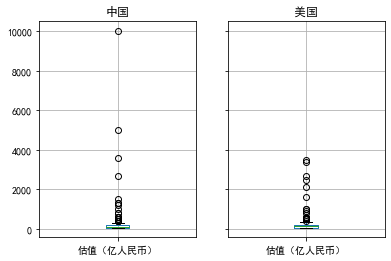

In [58]:
%matplotlib inline
import matplotlib as mpl  
mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签  
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号 

df[df.国家.isin(["中国","美国"])][['国家',"估值（亿人民币）"]].groupby ( by = '国家' ).boxplot()

中国         AxesSubplot(0.1,0.15;0.363636x0.75)
美国    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

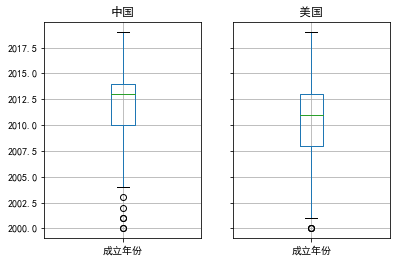

In [59]:
df[df.国家.isin(["中国","美国"])][['国家',"成立年份"]].groupby ( by = '国家' ).boxplot()

In [60]:
先行再城 = df.groupby ( by = ['行业', '城市'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先行再城)

企业名称 估值（亿人民币）               成立年份      
                 数量       总和           均值    最新    最早
行业    城市                                             
金融科技  杭州          4    10290  2572.500000  2015  2009
媒体和娱乐 北京          7     6890   984.285714  2013  2003
共享经济  北京          5     4040   808.000000  2016  2011
云计算   纽约          4     3950   987.500000  2011  2002
消费品   旧金山         2     3550  1775.000000  2017  2015
金融科技  上海          4     3470   867.500000  2015  2002
      旧金山         8     3100   387.500000  2017  2007
共享经济  旧金山         2     2770  1385.000000  2009  2008
航天    洛杉矶         1     2500  2500.000000  2002  2002
电子商务  北京         13     2300   176.923077  2015  2006
共享经济  纽约          1     2100  2100.000000  2010  2010
金融科技  北京          8     1920   240.000000  2018  2006
物流    旧金山         5     1870   374.000000  2013  2011
云计算   旧金山        14     1660   118.571429  2015  2005
金融科技  深圳          3     1640   546.666667  2016  2014
人工智能  北京          9     1430   158.888889  2016  2009
机器人   深圳          2     1300   650.000000  2012  2006
物流    杭州          1     1300  1300.000000  2013  2013
金融科技  伦敦          6     1250   208.333333  2015  2011
电子商务  旧金山         5     1110   222.000000  2017  2008
物流    北京          4     1040   260.000000  2014  2007
共享经济  新加坡         1     1000  1000.000000  2012  2012
媒体和娱乐 洛杉矶         1     1000  1000.000000  2007  2007
大数据   帕洛阿尔托       1     1000  1000.000000  2004  2004
区块链   旧金山         3      970   323.333333  2012  2011
健康科技  上海          3      970   323.333333  2016  2008
生命科学  圣地亚哥        2      870   435.000000  2013  2008
电子商务  雅加达         3      870   290.000000  2012  2009
区块链   北京          1      800   800.000000  2013  2013
电子商务  上海          8      780    97.500000  2015  2005
...             ...      ...          ...   ...   ...
大数据   罗利          1       70    70.000000  2011  2011
媒体和娱乐 华盛顿         1       70    70.000000  2003  2003
游戏    波士顿         1       70    70.000000  2012  2012
共享经济  马德里         1       70    70.000000  2011  2011
生命科学  波士顿         1       70    70.000000  2009  2009
电子商务  贝尔维尤        1       70    70.000000  2011  2011
健康科技  巴黎          1       70    70.000000  2013  2013
新零售   旧金山         1       70    70.000000  2015  2015
      班加罗尔        1       70    70.000000  2011  2011
游戏    孟买          1       70    70.000000  2012  2012
电子商务  洛杉矶         1       70    70.000000  2010  2010
      波士顿         1       70    70.000000  2007  2007
      汉堡          1       70    70.000000  2014  2014
人工智能  雷德伍德城       1       70    70.000000  2009  2009
健康科技  Guilford    1       70    70.000000  2011  2011
      圣保罗         1       70    70.000000  2012  2012
      尔湾          1       70    70.000000  2013  2013
电子商务  底特律         1       70    70.000000  2015  2015
生命科学  特拉维夫        1       70    70.000000  2010  2010
健康科技  广州          1       70    70.000000  2015  2015
电子商务  埃尔塞贡多       1       70    70.000000  2010  2010
      圣塔莫尼卡       1       70    70.000000  2016  2016
      古尔冈         1       70    70.000000  2011  2011
      卢森堡         1       70    70.000000  2014  2014
房地产科技 马卡迪         1       70    70.000000  2015  2015
      迈阿密         1       70    70.000000  2013  2013
新能源   坎贝尔         1       70    70.000000  2007  2007
房地产科技 纽约          1       70    70.000000  2012  2012
共享经济  塔林          1       70    70.000000  2013  2013
新能源   布里斯托尔       1       70    70.000000  2009  2009

[298 rows x 5 columns]

In [61]:
城市 = df.groupby ( by = ['城市'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(城市)

企业名称 估值（亿人民币）               成立年份      
            数量       总和           均值    最新    最早
城市                                              
北京          81    22130   273.209877  2019  2001
旧金山         55    17060   310.181818  2017  2004
杭州          19    13290   699.473684  2015  2000
上海          47     8990   191.276596  2017  2001
纽约          25     8640   345.600000  2015  2002
深圳          17     4440   261.176471  2018  2006
洛杉矶          3     3570  1190.000000  2010  2002
帕洛阿尔托       10     2740   274.000000  2016  2004
伦敦           9     1700   188.888889  2015  2011
雅加达          4     1570   392.500000  2012  2009
南京          11     1550   140.909091  2018  2006
班加罗尔         9     1500   166.666667  2017  2004
新加坡          2     1350   675.000000  2012  2012
门洛帕克         3     1300   433.333333  2016  2013
古尔冈          7     1160   165.714286  2014  2008
天津           3     1100   366.666667  2018  2013
圣地亚哥         4     1010   252.500000  2016  2008
首尔           5     1010   202.000000  2011  2005
广州           8     1000   125.000000  2017  2011
诺伊达          2      900   450.000000  2010  2010
雷德伍德城        9      870    96.666667  2014  2000
波士顿          8      820   102.500000  2013  2001
山景城          6      660   110.000000  2015  2006
圣马特奥         3      650   216.666667  2017  2004
柏林           4      640   160.000000  2013  2009
芝加哥          4      570   142.500000  2015  2012
圣保罗          4      510   127.500000  2013  2011
匹兹堡          1      500   500.000000  2015  2015
巴塞尔          1      500   500.000000  2014  2014
Emerville    1      500   500.000000  2007  2007
...        ...      ...          ...   ...   ...
贝尔维尤         1       70    70.000000  2011  2011
赫尔辛基         1       70    70.000000  2016  2016
阿拉米达         1       70    70.000000  2011  2011
迈阿密          1       70    70.000000  2013  2013
Stafford     1       70    70.000000  2006  2006
卢森堡          1       70    70.000000  2014  2014
苗必达          1       70    70.000000  2007  2007
耐斯兹敖那        1       70    70.000000  2010  2010
孟买           1       70    70.000000  2012  2012
尔湾           1       70    70.000000  2013  2013
塔林           1       70    70.000000  2013  2013
布宜诺斯艾利斯      1       70    70.000000  2013  2013
埃尔塞贡多        1       70    70.000000  2010  2010
底特律          1       70    70.000000  2015  2015
坎贝尔          1       70    70.000000  2007  2007
新德里          1       70    70.000000  2012  2012
无锡           1       70    70.000000  2010  2010
圣卡洛斯         1       70    70.000000  2001  2001
普莱森顿         1       70    70.000000  2012  2012
杭廷顿海滩        1       70    70.000000  2006  2006
桐乡           1       70    70.000000  2014  2014
哥伦布          1       70    70.000000  2015  2015
汉堡           1       70    70.000000  2014  2014
波哥大          1       70    70.000000  2016  2016
台北           1       70    70.000000  2006  2006
洛桑市          1       70    70.000000  2012  2012
盐湖城          1       70    70.000000  2008  2008
半月湾          1       70    70.000000  2014  2014
罗利           1       70    70.000000  2011  2011
马德里          1       70    70.000000  2011  2011

[120 rows x 5 columns]

In [62]:
城市.index[0:3]

Index(['北京', '旧金山', '杭州'], dtype='object', name='城市')

北京          AxesSubplot(0.1,0.559091;0.363636x0.340909)
旧金山    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
杭州              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

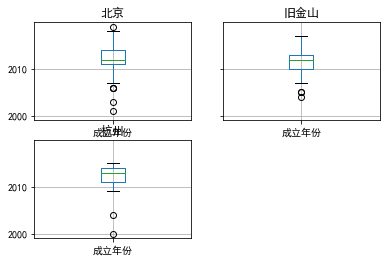

In [63]:
df[df.城市.isin(城市.index[0:3])][['城市',"成立年份"]].groupby ( by = '城市' ).boxplot()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
排名              494 non-null int64
企业名称            494 non-null object
Company Name    494 non-null object
估值（亿人民币）        494 non-null int64
国家              494 non-null object
城市              494 non-null object
行业              494 non-null object
掌门人/创始人         494 non-null object
成立年份            494 non-null int64
部分投资机构          494 non-null object
dtypes: int64(3), object(7)
memory usage: 38.7+ KB


In [66]:
df新 = df.copy()
df新 = df新.assign(国家=df.国家.astype('category'))
df新 = df新.assign(城市=df.城市.astype('category'))
df新 = df新.assign(行业=df.行业.astype('category'))
df新.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
排名              494 non-null int64
企业名称            494 non-null object
Company Name    494 non-null object
估值（亿人民币）        494 non-null int64
国家              494 non-null category
城市              494 non-null category
行业              494 non-null category
掌门人/创始人         494 non-null object
成立年份            494 non-null int64
部分投资机构          494 non-null object
dtypes: category(3), int64(3), object(4)
memory usage: 36.1+ KB


In [67]:
df新.国家

0         中国
1         中国
2         中国
3         美国
4         美国
5         美国
6         中国
7         美国
8         美国
9         美国
10        中国
11        中国
12        中国
13        中国
14        中国
15       新加坡
16        美国
17        美国
18        美国
19        中国
20        中国
21        美国
22     印度尼西亚
23        印度
24        中国
25        中国
26        韩国
27        中国
28        美国
29        美国
       ...  
464       中国
465       印度
466       美国
467       中国
468       中国
469       美国
470       美国
471       美国
472       美国
473       中国
474       美国
475       中国
476       中国
477       中国
478       中国
479       韩国
480       中国
481       中国
482       中国
483       中国
484       中国
485       中国
486       中国
487       中国
488       中国
489       美国
490       中国
491       中国
492       美国
493       美国
Name: 国家, Length: 494, dtype: category
Categories (24, object): [中国, 以色列, 卢森堡, 印度, ..., 西班牙, 阿根廷, 韩国, 马耳他]

#### 如何组合出击出报表

In [71]:
df.head()

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [69]:
df.groupby("国家").sum().head()
# 注意观察：
# 1、"国家" 变成了索引列
# 2、因为要统计sum()，不是数字的列全部自动忽略掉
# 3、是不是有的列数值并没有价值？
# 是的，排名与成立年份的数值没有价值

,排名,估值（亿人民币）,成立年份
国家,,,
中国,39407,54700,414473
以色列,1470,730,14068
卢森堡,264,70,2014
印度,3576,3850,42215
印度尼西亚,378,1570,8042


In [72]:
# as_index = False
df.groupby("国家",as_index = False).sum().head()
# 观察 "国家" 列是否还是索引？
# 否
# 总结as_index的用法
# 当as_index=True（默认）时，没有显示索引项，而是以第一列组标签为索引值，故不能通过df.loc[0]取值，可以通过df.loc[‘bk1’]取值；当as_index=False时，显示索引项，此时可以通过df.loc[0]取得值。因此as_index的作用是控制聚合输出是否以组标签为索引值。

,国家,排名,估值（亿人民币）,成立年份
0,中国,39407,54700,414473
1,以色列,1470,730,14068
2,卢森堡,264,70,2014
3,印度,3576,3850,42215
4,印度尼西亚,378,1570,8042


In [73]:
# mean() 平均值
df.groupby(["国家","行业"]).mean()

排名    估值（亿人民币）         成立年份
国家  行业                                          
中国  云计算      230.800000   92.000000  2012.400000
    人工智能     189.333333  139.333333  2013.466667
    健康科技     206.538462  158.461538  2011.384615
    共享经济     148.750000  592.500000  2014.375000
    区块链      116.500000  312.500000  2014.000000
    大数据      250.666667   80.000000  2011.111111
    媒体和娱乐    151.647059  484.117647  2011.529412
    房地产科技    183.142857  191.428571  2012.571429
    教育科技     211.272727  108.181818  2010.181818
    新能源      264.000000   70.000000  2007.000000
    新能源汽车    168.500000  150.833333  2015.666667
    新零售      232.500000   90.000000  2013.500000
    机器人       98.666667  466.666667  2010.333333
    消费品      170.750000  155.000000  2014.750000
    游戏       224.000000  100.000000  2015.000000
    物流       182.125000  244.375000  2011.250000
    生命科学     209.000000  110.000000  2010.500000
    电子商务     209.424242  127.878788  2011.303030
    网络安全      84.000000  200.000000  2015.000000
    软件与服务    224.533333   97.333333  2010.400000
    金融科技     174.363636  816.363636  2012.136364
以色列 云计算      201.000000  110.000000  2011.500000
    人工智能     264.000000   70.000000  2010.000000
    生命科学     264.000000   70.000000  2010.000000
    软件与服务    138.000000  150.000000  2002.000000
卢森堡 电子商务     264.000000   70.000000  2014.000000
印度  共享经济     119.000000  273.333333  2013.333333
    即时通讯     264.000000   70.000000  2012.000000
    大数据      138.000000  150.000000  2004.000000
    教育科技      43.000000  400.000000  2008.000000
...                 ...         ...          ...
美国  新能源      264.000000   70.000000  2007.800000
    新能源汽车    123.666667  240.000000  2012.666667
    新零售      243.000000   83.333333  2010.500000
    机器人       84.000000  200.000000  2016.000000
    消费品      173.000000  580.000000  2012.714286
    游戏       124.000000  194.000000  2008.000000
    物流       148.777778  256.666667  2012.888889
    生命科学     131.600000  266.000000  2011.500000
    电子商务     201.235294  155.294118  2011.411765
    网络安全     225.666667  141.666667  2010.833333
    航天       118.666667  923.333333  2006.666667
    虚拟与增强现实   50.000000  350.000000  2010.500000
    软件与服务    232.500000   90.000000  2010.500000
    金融科技     144.761905  239.047619  2010.952381
芬兰  消费品      264.000000   70.000000  2016.000000
英国  人工智能     138.000000  150.000000  2014.500000
    新能源      264.000000   70.000000  2009.000000
    游戏       138.000000  150.000000  2012.000000
    物流       138.000000  150.000000  2012.000000
    生命科学     138.000000  150.000000  2005.000000
    电子商务      50.000000  350.000000  2004.000000
    金融科技      97.333333  208.333333  2012.833333
菲律宾 房地产科技    264.000000   70.000000  2015.000000
西班牙 共享经济     264.000000   70.000000  2011.000000
阿根廷 云计算      264.000000   70.000000  2013.000000
韩国  游戏        50.000000  350.000000  2007.000000
    物流        84.000000  200.000000  2011.000000
    电子商务     184.333333  246.666667  2008.333333
    金融科技     264.000000   70.000000  2011.000000
马耳他 区块链      138.000000  150.000000  2017.000000

[103 rows x 3 columns]

#### 同时查看多种数据

In [74]:
df.groupby("国家").agg(["sum","mean","max","min"]).head()
# 观察，列变成了多级索引

排名                       估值（亿人民币）                           成立年份  \
         sum        mean  max  min      sum        mean    max min     sum   
国家                                                                           
中国     39407  191.296117  264    1    54700  265.533981  10000  70  414473   
以色列     1470  210.000000  264  138      730  104.285714    150  70   14068   
卢森堡      264  264.000000  264  264       70   70.000000     70  70    2014   
印度      3576  170.285714  264   23     3850  183.333333    700  70   42215   
印度尼西亚    378   94.500000  264   23     1570  392.500000    700  70    8042   

                                
              mean   max   min  
国家                              
中国     2012.004854  2019  2000  
以色列    2009.714286  2013  2002  
卢森堡    2014.000000  2014  2014  
印度     2010.238095  2017  2000  
印度尼西亚  2010.500000  2012  2009

#### 筛选查看单个列或者所需列的数据统计

In [75]:
df.groupby("国家")["估值（亿人民币）"].agg(["sum","mean","count"]).head()

,sum,mean,count
国家,,,
中国,54700,265.533981,206
以色列,730,104.285714,7
卢森堡,70,70.000000,1
印度,3850,183.333333,21
印度尼西亚,1570,392.500000,4


In [76]:
# 看下最早和最新的年份
df.groupby("国家")["成立年份"].agg(["max","min"]).head()

,max,min
国家,,
中国,2019,2000
以色列,2013,2002
卢森堡,2014,2014
印度,2017,2000
印度尼西亚,2012,2009


#### Groupby 排序

In [78]:
# sort
df.groupby(["国家","行业"],sort=False).agg(["sum","count"])["估值（亿人民币）"]

sum  count
国家    行业                   
中国    金融科技     17960     22
      媒体和娱乐     8230     17
      共享经济      4740      8
美国    云计算       6880     32
      消费品       4060      7
      共享经济      5670      6
      航天        2770      3
      金融科技      5020     21
中国    物流        3910     16
      机器人       1400      3
新加坡   共享经济      1000      1
美国    媒体和娱乐     1720      6
      大数据       1850      8
      物流        2310      9
中国    区块链       1250      4
美国    生命科学      2660     10
印度尼西亚 共享经济       700      1
印度    金融科技       920      3
中国    房地产科技     1340      7
      电子商务      4220     33
韩国    电子商务       740      3
中国    健康科技      2060     13
美国    电子商务      2640     17
      区块链       1170      4
      人工智能      3080     20
瑞士    生命科学       500      1
美国    网络安全       850      6
印度尼西亚 电子商务       870      3
印度    教育科技       400      1
美国    虚拟与增强现实    700      2
...              ...    ...
日本    人工智能       150      1
美国    软件与服务      360      4
印度    新能源        150      1
中国    游戏         100      1
      大数据        720      9
美国    教育科技       210      3
阿根廷   云计算         70      1
印度    新零售         70      1
爱沙尼亚  共享经济        70      1
西班牙   共享经济        70      1
美国    新能源        350      5
法国    媒体和娱乐       70      1
      健康科技        70      1
印度    游戏          70      1
中国    新能源        140      2
卢森堡   电子商务        70      1
巴西    健康科技        70      1
印度    即时通讯        70      1
芬兰    消费品         70      1
巴西    物流         140      2
印度    软件与服务       70      1
以色列   生命科学        70      1
日本    区块链         70      1
法国    人工智能        70      1
瑞士    虚拟与增强现实     70      1
以色列   人工智能        70      1
英国    新能源         70      1
哥伦比亚  物流          70      1
菲律宾   房地产科技       70      1
韩国    金融科技        70      1

[103 rows x 2 columns]

In [79]:
# sort_values()方法
df.groupby(["国家","行业"]).agg(["sum","mean","count"])["估值（亿人民币）"].sort_values(by="count",ascending = False)

sum         mean  count
国家   行业                              
中国   电子商务    4220   127.878788     33
美国   云计算     6880   215.000000     32
中国   金融科技   17960   816.363636     22
美国   金融科技    5020   239.047619     21
     人工智能    3080   154.000000     20
     电子商务    2640   155.294118     17
中国   媒体和娱乐   8230   484.117647     17
     物流      3910   244.375000     16
     人工智能    2090   139.333333     15
     软件与服务   1460    97.333333     15
     健康科技    2060   158.461538     13
     新能源汽车   1810   150.833333     12
美国   健康科技    1550   129.166667     12
中国   教育科技    1190   108.181818     11
美国   生命科学    2660   266.000000     10
中国   大数据      720    80.000000      9
美国   物流      2310   256.666667      9
     大数据     1850   231.250000      8
中国   共享经济    4740   592.500000      8
     房地产科技   1340   191.428571      7
美国   消费品     4060   580.000000      7
     网络安全     850   141.666667      6
英国   金融科技    1250   208.333333      6
美国   共享经济    5670   945.000000      6
     新零售      500    83.333333      6
     媒体和娱乐   1720   286.666667      6
     游戏       970   194.000000      5
     新能源      350    70.000000      5
     房地产科技    610   122.000000      5
     即时通讯     510   102.000000      5
...           ...          ...    ...
印度   新零售       70    70.000000      1
     新能源      150   150.000000      1
     教育科技     400   400.000000      1
     即时通讯      70    70.000000      1
巴西   健康科技      70    70.000000      1
卢森堡  电子商务      70    70.000000      1
以色列  软件与服务    150   150.000000      1
     生命科学      70    70.000000      1
     人工智能      70    70.000000      1
中国   网络安全     200   200.000000      1
     游戏       100   100.000000      1
哥伦比亚 物流        70    70.000000      1
巴西   金融科技     300   300.000000      1
瑞士   生命科学     500   500.000000      1
法国   媒体和娱乐     70    70.000000      1
瑞士   区块链      150   150.000000      1
瑞典   金融科技     300   300.000000      1
     新能源      150   150.000000      1
爱沙尼亚 共享经济      70    70.000000      1
爱尔兰  云计算      150   150.000000      1
澳大利亚 云计算      200   200.000000      1
法国   共享经济     150   150.000000      1
德国   生命科学     150   150.000000      1
法国   人工智能      70    70.000000      1
日本   区块链       70    70.000000      1
     人工智能     150   150.000000      1
新加坡  电子商务     350   350.000000      1
     共享经济    1000  1000.000000      1
德国   金融科技     200   200.000000      1
马耳他  区块链      150   150.000000      1

[103 rows x 3 columns]

#### 不同列使用不同函数并定义列名,并排序

In [80]:
df.groupby(["国家","行业"]).agg(["sum","mean","count"])["估值（亿人民币）"]\
.rename ( columns = {"sum":"总和", "mean":"均值","count":"数量"} )\
.sort_values(by = "总和", ascending = False)

总和           均值  数量
国家   行业                             
中国   金融科技     17960   816.363636  22
     媒体和娱乐     8230   484.117647  17
美国   云计算       6880   215.000000  32
     共享经济      5670   945.000000   6
     金融科技      5020   239.047619  21
中国   共享经济      4740   592.500000   8
     电子商务      4220   127.878788  33
美国   消费品       4060   580.000000   7
中国   物流        3910   244.375000  16
美国   人工智能      3080   154.000000  20
     航天        2770   923.333333   3
     生命科学      2660   266.000000  10
     电子商务      2640   155.294118  17
     物流        2310   256.666667   9
中国   人工智能      2090   139.333333  15
     健康科技      2060   158.461538  13
美国   大数据       1850   231.250000   8
中国   新能源汽车     1810   150.833333  12
美国   媒体和娱乐     1720   286.666667   6
     健康科技      1550   129.166667  12
中国   软件与服务     1460    97.333333  15
     机器人       1400   466.666667   3
     房地产科技     1340   191.428571   7
英国   金融科技      1250   208.333333   6
中国   区块链       1250   312.500000   4
     教育科技      1190   108.181818  11
美国   区块链       1170   292.500000   4
新加坡  共享经济      1000  1000.000000   1
美国   游戏         970   194.000000   5
印度   金融科技       920   306.666667   3
...             ...          ...  ..
以色列  软件与服务      150   150.000000   1
瑞士   区块链        150   150.000000   1
日本   人工智能       150   150.000000   1
印度   大数据        150   150.000000   1
爱尔兰  云计算        150   150.000000   1
瑞典   新能源        150   150.000000   1
中国   新能源        140    70.000000   2
巴西   物流         140    70.000000   2
中国   游戏         100   100.000000   1
以色列  人工智能        70    70.000000   1
印度   即时通讯        70    70.000000   1
阿根廷  云计算         70    70.000000   1
西班牙  共享经济        70    70.000000   1
菲律宾  房地产科技       70    70.000000   1
以色列  生命科学        70    70.000000   1
韩国   金融科技        70    70.000000   1
卢森堡  电子商务        70    70.000000   1
瑞士   虚拟与增强现实     70    70.000000   1
印度   新零售         70    70.000000   1
英国   新能源         70    70.000000   1
芬兰   消费品         70    70.000000   1
印度   游戏          70    70.000000   1
     软件与服务       70    70.000000   1
哥伦比亚 物流          70    70.000000   1
巴西   健康科技        70    70.000000   1
日本   区块链         70    70.000000   1
法国   人工智能        70    70.000000   1
     媒体和娱乐       70    70.000000   1
爱沙尼亚 共享经济        70    70.000000   1
法国   健康科技        70    70.000000   1

[103 rows x 3 columns]